In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [30]:
class LinearRegression:
    def __init__(self, x_):
        """
        Initialisation du poids θ
        :param x_: Matrice des variables
        """
        _, n = x_.shape
        self.theta_ = np.random.randn(n+1, 1)

    def predict(self, x_):
        """
        Calcul du Modèle linéaire f(X) = X.θ
        :param x_: Matrice des variables
        """
        m, _ = x_.shape
        X_ = np.hstack(( x_, np.ones((m, 1)) ))
        return X_ @ self.theta_

    @staticmethod
    def cost_function(fx_, y_):
        """
        Fonction de coût J(θ) = 1/2m * ∑(X.θ - Y)²
        :param fx_: Matrice des valeurs prédites par le modèle
        :param y_: Matrice de la Target
        """
        m, _ = y_.shape
        return 1/(2*m) * np.sum( (fx_ - y_)**2 )

    def fit(self, x_, y_, learning_rate:float=0.01, n_iterations:int=1000):
        """
        Ajustement du modèle avec la méthode de la descente de gradient
        :param x_: Matrice des variables
        :param y_: Matrice de la Target
        :param learning_rate: Taux d'apprentissage
        :param n_iterations: Nombre d'itérations du gradient descent
        :return: Poids θ final
        """
        m, n = x_.shape
        X_ = np.hstack( (x_, np.ones((m, 1))) )
        cost_history = np.zeros(n_iterations)

        for i in range(0, n_iterations):
            self.theta_ = self.theta_ - learning_rate * (1/m * (X_.transpose().dot(self.predict(x_) - y_)))
            cost_history[i] = self.cost_function(self.predict(x_), y_)

        return cost_history

    @staticmethod
    def r_sqrt_performance(fx_, y_):
        """
        Coéfficient de Détermination R² = 1 - (∑(Y — f(x))² / ∑(Y - Ȳ)²)
        :param fx_: Matrice des valeurs prédites par le modèle
        :param y_: Matrice de la Target
        :return: R²
        """
        u = np.sum((y_ - fx_)**2)
        v = np.sum((y_ - y_.mean())**2)
        return 1 - u/v


# Dataset

In [31]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(m, 1)

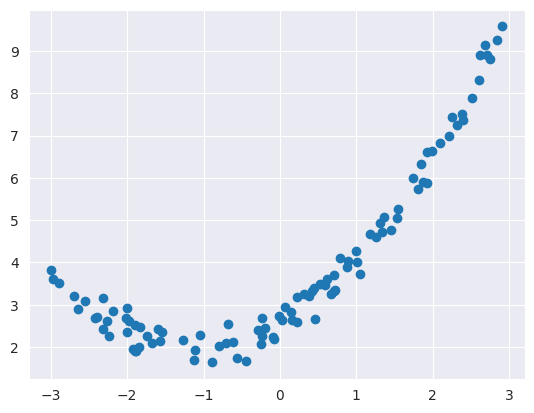

In [32]:
plt.scatter(x, y)
plt.show()

In [33]:
norm = StandardScaler()
x = norm.fit_transform(x)

In [34]:
linear_reg = LinearRegression(x)
j_hist = linear_reg.fit(x, y)

In [35]:
y_pred = linear_reg.predict(x)

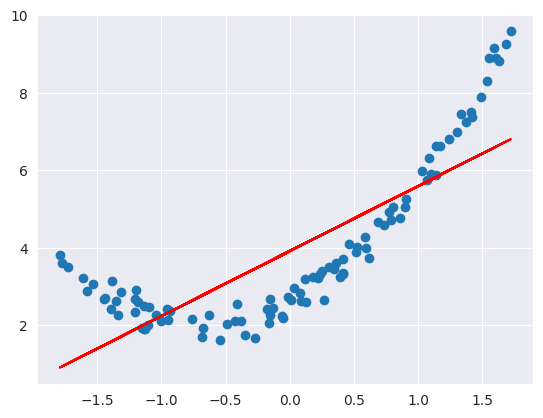

In [36]:
plt.scatter(x, y)
plt.plot(x, y_pred, c='r')
plt.show()

# kernel trick

In [37]:
class KernelTrick:
    def __init__(self, x_):
        self.landmarks_ = x_

    @classmethod
    def kernel_function(cls, x_, l_, sigma_=1):
        return np.exp( -(np.linalg.norm(x_ - l_, axis=1))**2 / (2 * sigma_**2) )

    def kernel_trick(self, x_):
        X_ = np.zeros((x_.shape[0], self.landmarks_.shape[0]))
        n_column = 0
        for l_ in self.landmarks_:
            new_x_ = self.kernel_function(x_, l_)
            X_[:, n_column] = new_x_
            n_column +=1
        return X_

In [38]:
ker_method = KernelTrick(x)
x_linear = ker_method.kernel_trick(x)

In [39]:
linear_reg = LinearRegression(x_linear)
J_history = linear_reg.fit(x_linear, y)
y_pred = linear_reg.predict(x_linear)

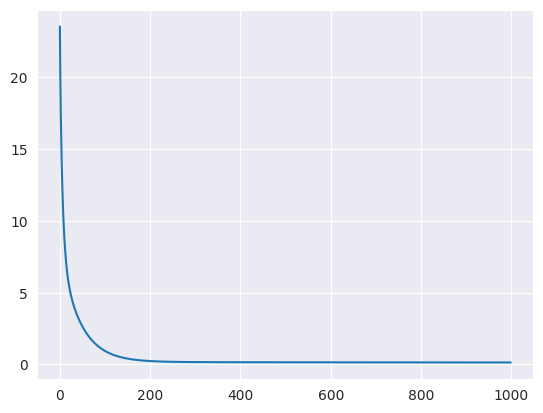

In [41]:
plt.plot(J_history)
plt.show()

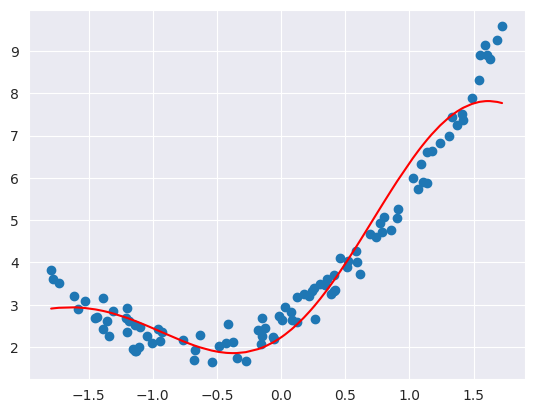

In [40]:
import seaborn as sns

plt.scatter(x, y)
sns.lineplot(x=x.flatten(), y=y_pred.flatten(), c='r')
plt.show()